In [3]:
%load_ext autoreload
%autoreload 2

In [18]:
from data import MePicsSet
from display import show_keypoints
import torch
from torch.utils.data import DataLoader
from learn import test
import numpy as np
import morph, utils
from pathlib import Path
import my_types as mt
import matplotlib.pyplot as plt

In [19]:
OUT_DIR = Path("output")

In [20]:
april_dataset = MePicsSet()
april_loader = DataLoader(april_dataset, batch_size=8, shuffle=False)

In [21]:
model3_path = max(OUT_DIR.glob("model3*"), key=lambda p: Path(p).stat().st_mtime)
model3 = torch.load(model3_path, map_location="cpu")
print(f"loaded {model3_path}")

loaded output/model3-1604452069.3288136.pt


In [22]:
april_imgs, april_preds = test(april_loader, model3)

100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


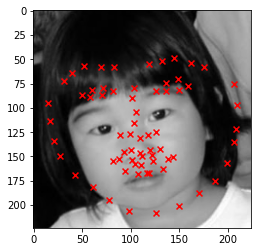

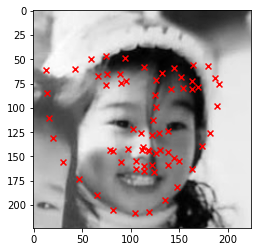

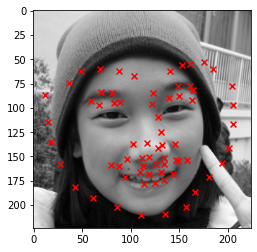

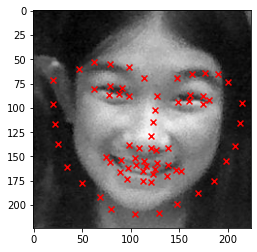

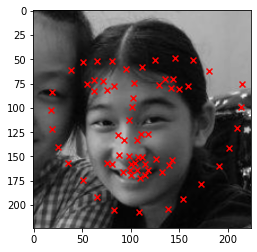

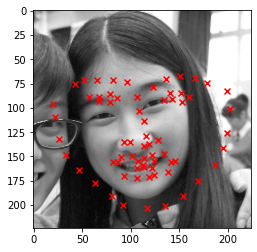

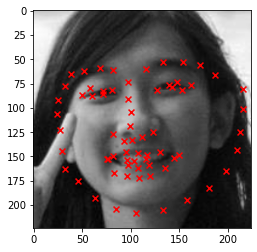

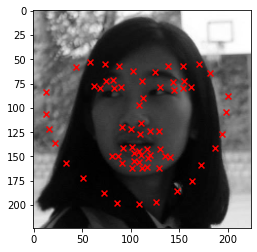

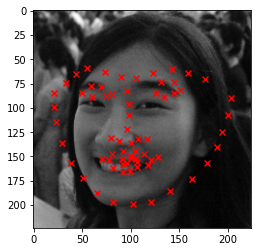

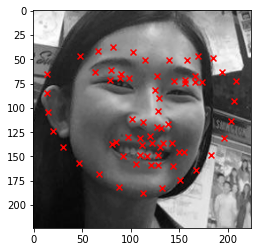

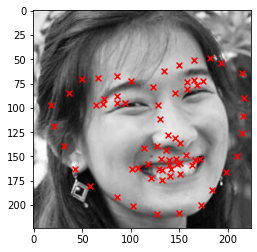

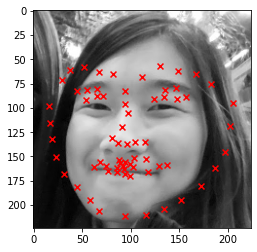

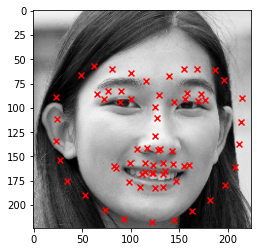

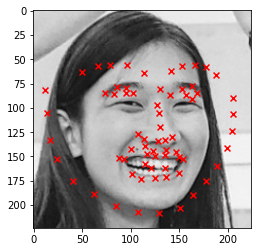

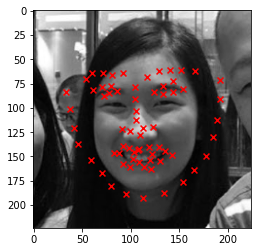

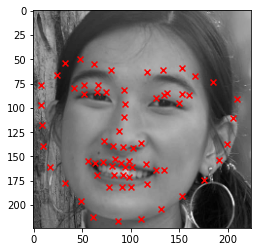

In [23]:
for i, p in zip(april_imgs, april_preds):
    show_keypoints(image=i, truth_points=None, pred_points=p)

In [24]:
april_imgs[0].shape
morph_imgs = []
for img in april_imgs:
    im = img.repeat(3,1,1).permute(1,2,0).cpu().detach().numpy()
    morph_imgs.append(im)

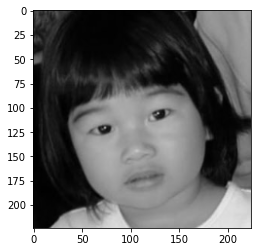

In [25]:
morph_imgs[0].shape
plt.imshow(morph_imgs[0])

In [26]:
morph_pts = [224 * p.cpu().detach().numpy() for p in april_preds]
print(morph_pts[0])

[[ 14.9656315  95.27547  ]
 [ 16.711258  113.82295  ]
 [ 21.223392  133.72478  ]
 [ 27.257967  149.33377  ]
 [ 42.116043  169.27142  ]
 [ 60.661575  181.64444  ]
 [ 77.4822    194.73921  ]
 [ 97.795975  206.18576  ]
 [126.23397   207.99791  ]
 [149.823     201.0022   ]
 [169.8371    187.20837  ]
 [186.2405    174.8377   ]
 [198.97282   156.34045  ]
 [206.15164   134.84576  ]
 [208.55891   121.3226   ]
 [209.0726     96.784134 ]
 [206.27818    75.034874 ]
 [ 31.064173   72.74906  ]
 [ 39.235622   63.653633 ]
 [ 51.82389    56.770298 ]
 [ 69.58982    58.139275 ]
 [ 82.972244   57.702736 ]
 [118.33649    54.343887 ]
 [131.85991    51.79874  ]
 [144.74614    48.668194 ]
 [161.90468    53.483902 ]
 [175.25658    57.93795  ]
 [103.19199    79.40038  ]
 [101.15771    89.87001  ]
 [105.4882    103.87021  ]
 [103.15207   115.57     ]
 [ 88.72794   127.79586  ]
 [ 98.924835  127.28708  ]
 [108.90329   130.69142  ]
 [117.30362   127.64558  ]
 [126.16629   125.29704  ]
 [ 50.100174   86.35132  ]
 

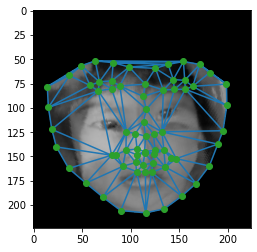

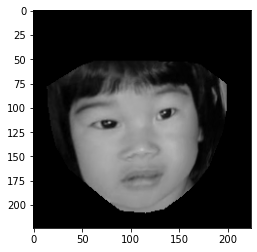

In [27]:
# plt.imshow(img)
middle, mid_pts, del_tri = morph.compute_middle_object(
    morph_imgs[0], morph_imgs[1], morph_pts[0], morph_pts[1], alpha=0.5
)
morph.plot_tri_mesh(middle, mid_pts, del_tri)
warped1 = morph.warp_img(
    morph_imgs[0], morph_pts[0], mid_pts, del_tri
)
plt.imshow(warped1)

In [ ]:
filename = OUT_DIR / f"morph_me_{time.time():.0f}.mp4"
morph.make_giant_video(morph_imgs, morph_pts, fps=25, filename=filename)